 #  <div style="text-align: center">  isFraud- ML Explainability</div> 
###  <div style="text-align: center">CLEAR DATA. MADE MODEL. </div> 
<img src='http://s8.picofile.com/file/8366817976/ieee.png' width=600 height=600>
<div style="text-align:center"> last update: <b> 16/07/2019</b></div>



You can fork code  and  follow me on:

> ###### [ GitHub](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)
> ###### [Kaggle](https://www.kaggle.com/mjbahmani/)
-------------------------------------------------------------------------------------------------------------
 <b>I hope you find this kernel helpful and some <font color='red'>UPVOTES</font> would be very much appreciated.</b>
    
 -----------

 <a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Load packages](#2)
    1. [import](21)
    1. [Setup](22)
    1. [Version](23)
1. [Problem Definition](#3)
    1. [Problem Feature](#31)
    1. [Aim](#32)
    1. [Variables](#33)
    1. [Evaluation](#34)
1. [Exploratory Data Analysis(EDA)](#4)
    1. [Data Collection](#41)
    1. [Visualization](#42)
    1. [Data Preprocessing](#43)
1. [References](#7)

 <a id="1"></a> <br>
## 1- Introduction
The [IEEE](http://sites.ieee.org/thailand-cis/) Computational Intelligence Society is a professional society of the Institute of Electrical and Electronics Engineers (IEEE) focussing on "the theory, design, application, and development of biologically and linguistically motivated computational paradigms emphasizing neural networks, connectionist systems, genetic algorithms, evolutionary programming, fuzzy systems, and hybrid intelligent systems in which these paradigms are contained.[1]
<img src='https://upload.wikimedia.org/wikipedia/en/thumb/2/21/IEEE_logo.svg/375px-IEEE_logo.svg.png' width=400 height=400>

In this kernel we are going to create a **Machine Learning Explainability** for **IEEE** based this perfect [course](https://www.kaggle.com/learn/machine-learning-explainability) in kaggle.
><font color="red"><b>Note: </b></font>
how to extract **insights** from models?

<a id="2"></a> <br>
## 2- A Data Science Workflow for IEEE 
Of course, the same solution can not be provided for all problems, so the best way is to create a **general framework** and adapt it to new problem.

**You can see my workflow in the below image** :

 <img src="http://s8.picofile.com/file/8342707700/workflow2.png"  />

**You should feel free	to	adjust 	this	checklist 	to	your needs.**
###### [Go to top](#top)

 <a id="2"></a> <br>
 ## 2- Load packages
  <a id="21"></a> <br>
## 2-1 Import

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,Pool
from IPython.display import display
import matplotlib.patches as patch
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from scipy.stats import norm
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import time
import glob
import sys
import os
import gc

 <a id="22"></a> <br>
##  2-2 Setup

In [2]:
# for get better result chage fold_n to 5
fold_n=5
folds = StratifiedKFold(n_splits=fold_n, shuffle=True, random_state=10)
%matplotlib inline
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

 <a id="23"></a> <br>
## 2-3 Version


In [3]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 0.23.4
numpy: 1.16.4
Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


<a id="3"></a> 
<br>
## 3- Problem Definition
In this competition, you’ll benchmark machine learning models on a challenging **large-scale** dataset. The data comes from **Vesta's real-world e-commerce transactions** and contains a wide range of features from **device type to product features**. You also have the opportunity to create new features to improve your results.



<a id="31"></a> 
### 3-1 Problem Feature

1. train_{transaction, identity}.csv - the training set
1. test_{transaction, identity}.csv - the test set (you must predict the isFraud value for these observations)
1. sample_submission.csv - a sample submission file in the correct format


<a id="32"></a> 
### 3-2 Aim
In this competition, For each **TransactionID** in the test set, you must predict a probability for the **isFraud** variable.

<a id="33"></a> 
### 3-3 Variables
The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.
1. Categorical Features - Transaction
    1. ProductCD
    1. emaildomain
    1. card1 - card6
    1. addr1, addr2
    1. P_emaildomain
    1. R_emaildomain
    1. M1 - M9
1. Categorical Features - Identity
    1. DeviceType
    1. DeviceInfo
    1. id_12 - id_38

The task is to predict the value of **isFraud** in the test set.

<a id="34"></a> 
## 3-4 evaluation
**Submissions** are evaluated on area under the [ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.
<img src='https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png' width=300 height=300>

In [4]:
from sklearn.metrics import roc_auc_score, roc_curve

<a id="4"></a> 
## 4- Exploratory Data Analysis(EDA)
 In this section, we'll analysis how to use graphical and numerical techniques to begin uncovering the structure of your data. 
*  Data Collection
*  Visualization
*  Data Preprocessing
*  Data Cleaning
<img src="http://s9.picofile.com/file/8338476134/EDA.png" width=400 height=400>

 <a id="41"></a> <br>
## 4-1 Data Collection

In [5]:
print(os.listdir("../input/"))

['test_identity.csv', 'sample_submission.csv', 'train_identity.csv', 'train_transaction.csv', 'test_transaction.csv']


In [6]:
# import Dataset to play with it
train_identity= pd.read_csv("../input/train_identity.csv", index_col='TransactionID')
train_transaction= pd.read_csv("../input/train_transaction.csv", index_col='TransactionID')
test_identity= pd.read_csv("../input/test_identity.csv", index_col='TransactionID')
test_transaction = pd.read_csv('../input/test_transaction.csv', index_col='TransactionID')
sample_submission = pd.read_csv('../input/sample_submission.csv', index_col='TransactionID')

In [7]:
sample_submission.head()

,isFraud
TransactionID,
3663549,0.5
3663550,0.5
3663551,0.5
3663552,0.5
3663553,0.5


In [8]:
train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

# Reducing  memory size more than 50%
Because we make a lot of calculations in this kernel, we'd better reduce the size of the data.

In [9]:
#Based on this great kernel https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",df[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",df[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return df, NAlist

you can uncomment following code if you have limited Ram.

In [10]:
# train, NAlist = reduce_mem_usage(train)
# print("_________________")
# print("")
# print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
# print("_________________")
# print("")
# print(NAlist)

Memory usage of properties dataframe is : 1975.3707885742188  MB
******************************
Column:  isFraud
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  TransactionDT
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  TransactionAmt
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  card1
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  card2
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  card3
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  card5
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  addr1
dtype before:  float64
dtype af

dtype after:  uint8
******************************
******************************
Column:  V30
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V31
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V32
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V33
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V34
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V35
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V36
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V37
dtype before:  float64
dtype after:  uint8
******************************
*****

dtype after:  uint8
******************************
******************************
Column:  V100
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V101
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  V102
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  V103
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  V104
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V105
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V106
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V107
dtype before:  float64
dtype after:  uint8
*************************

dtype after:  uint16
******************************
******************************
Column:  V169
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V170
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V171
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V172
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V173
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V174
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V175
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V176
dtype before:  float64
dtype after:  uint8
***************************

dtype after:  uint8
******************************
******************************
Column:  V238
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V239
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V240
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V241
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V242
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V243
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V244
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V245
dtype before:  float64
dtype after:  uint16
***************************

dtype after:  float32
******************************
******************************
Column:  V307
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V308
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V309
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V310
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V311
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V312
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V313
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V314
dtype before:  float64
dtype after:  float32
**********

you can uncomment following code if you have limited Ram.

In [11]:
# test, NAlist = reduce_mem_usage(test)
# print("_________________")
# print("")
# print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
# print("_________________")
# print("")
# print(NAlist)

Memory usage of properties dataframe is : 1693.867820739746  MB
******************************
Column:  TransactionDT
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  TransactionAmt
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  card1
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  card2
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  card3
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  card5
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  addr1
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  addr2
dtype before:  float64
dtype af

dtype after:  uint8
******************************
******************************
Column:  V31
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V32
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V33
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V34
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V35
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V36
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V37
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V38
dtype before:  float64
dtype after:  uint8
******************************
*****

dtype after:  uint8
******************************
******************************
Column:  V101
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V102
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V103
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V104
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V105
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V106
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V107
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V108
dtype before:  float64
dtype after:  uint8
****************************

dtype after:  uint8
******************************
******************************
Column:  V170
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V171
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V172
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V173
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V174
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V175
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V176
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V177
dtype before:  float64
dtype after:  uint8
****************************

dtype after:  uint8
******************************
******************************
Column:  V239
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V240
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V241
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V242
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V243
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V244
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V245
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  V246
dtype before:  float64
dtype after:  uint8
****************************

dtype after:  float32
******************************
******************************
Column:  V308
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V309
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V310
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V311
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V312
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V313
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V314
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  V315
dtype before:  float64
dtype after:  float32
**********

 <a id="41"></a> <br>
##   4-1-1Data Set fields

In [12]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,99,150,discover,142,credit,315,87,19,65535,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,65535,13,-123,65535,-84,65535,-1.0,-1.0,13,...,-101,0,-14,-29,-73,-101,-47,-101,-37,-101,89.0,NaN,9,-661,NaN,NaN,99,9,99,99,99,9,NaN,10,99,99,NaN,NaN,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404,150,mastercard,102,credit,325,87,65535,65535,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,65535,65535,0,65535,-84,65535,-1.0,-1.0,0,...,-101,0,-14,-29,-73,-101,-47,-101,-37,-101,89.0,NaN,9,-661,NaN,NaN,99,9,99,99,99,9,NaN,10,99,99,NaN,NaN,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490,150,visa,166,debit,330,87,287,65535,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,65535,65535,0,65535,-84,65535,-1.0,-1.0,0,...,-101,0,-14,-29,-73,-101,-47,-101,-37,-101,89.0,NaN,9,-661,NaN,NaN,99,9,99,99,99,9,NaN,10,99,99,NaN,NaN,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567,150,mastercard,117,debit,476,87,65535,65535,yahoo.com,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112,0,94,0,-84,65535,-1.0,-1.0,84,...,-101,0,-14,-29,-73,-101,-47,-101,-37,-101,89.0,NaN,9,-661,NaN,NaN,99,9,99,99,99,9,NaN,10,99,99,NaN,NaN,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514,150,mastercard,102,credit,420,87,65535,65535,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,65535,65535,-123,65535,-84,65535,-1.0,-1.0,65535,...,0,70787,-14,-29,-73,-101,-47,-101,-37,-101,100.0,NotFound,9,-480,New,NotFound,166,9,542,144,99,9,NaN,10,99,99,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [13]:
print(len(train.columns))

433


In [14]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 433 entries, isFraud to DeviceInfo
dtypes: float32(80), int16(7), int8(9), object(31), uint16(63), uint32(2), uint8(241)
memory usage: 568.5+ MB
None


 <a id="422"></a> <br>
## 4-2-2 Numerical Values Describe

In [ ]:
train.describe()

 <a id="42"></a> <br>
## 4-2 Visualization

<a id="421"></a> 
## 4-2-1 hist

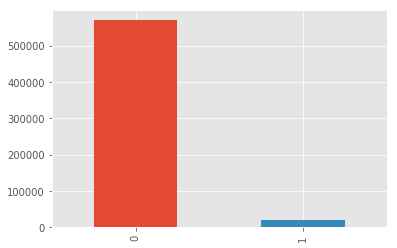

In [15]:
train['isFraud'].value_counts().plot.bar();

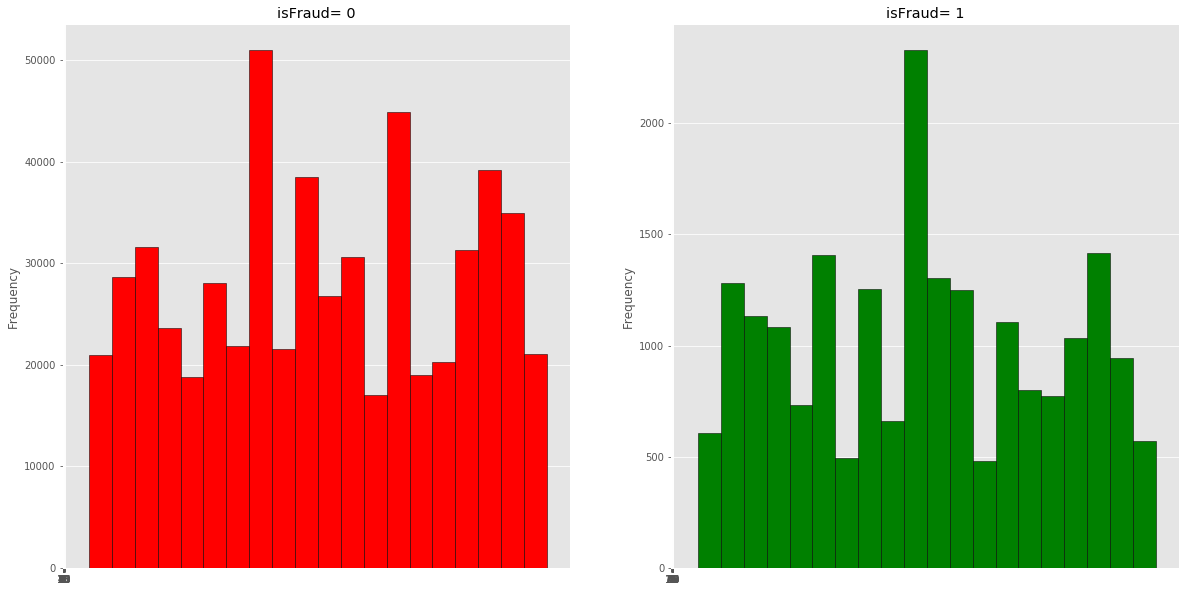

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['isFraud']==0].card1.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('isFraud= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['isFraud']==1].card1.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('isFraud= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

<a id="423"></a> 
## 4-2-3 countplot

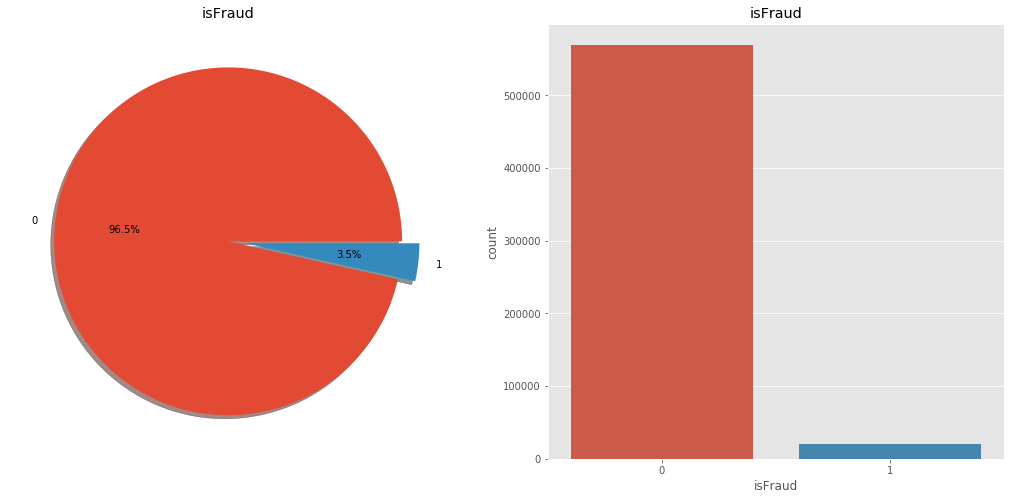

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['isFraud'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('isFraud')
ax[0].set_ylabel('')
sns.countplot('isFraud',data=train,ax=ax[1])
ax[1].set_title('isFraud')
plt.show()

<a id="424"></a> 
## 4-2-4 Hist
If you check histogram for all feature, you will find that most of them are so similar

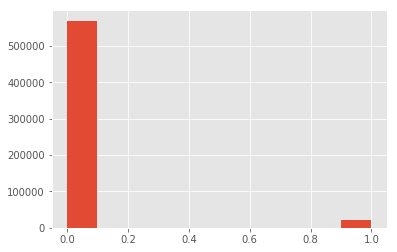

In [19]:
train["isFraud"].hist();

<a id="426"></a> 
## 4-2-6 distplot
 The target in data set is **imbalance**

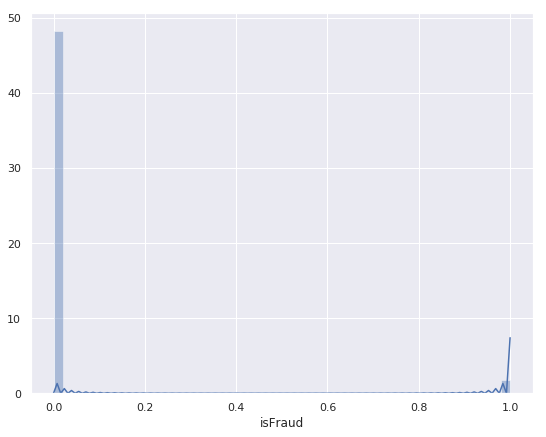

In [20]:
sns.set(rc={'figure.figsize':(9,7)})
sns.distplot(train['isFraud']);

<a id="427"></a> 
## 4-2-7 violinplot

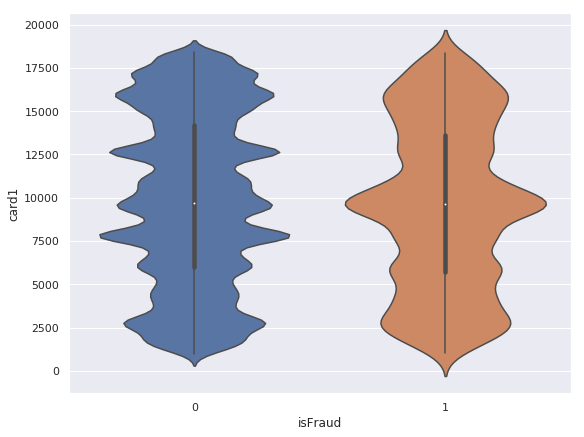

In [21]:
sns.violinplot(data=train,x="isFraud", y="card1")

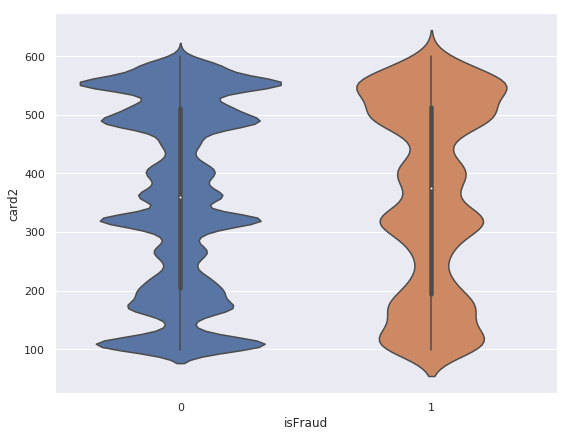

In [22]:
sns.violinplot(data=train,x="isFraud", y="card2")

 <a id="43"></a> <br>
## 4-3 Data Preprocessing
Before we start this section let me intrduce you, some other compitation that they were similar to this:

1. https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/overview
1. https://www.kaggle.com/mlg-ulb/creditcardfraud

 <a id="431"></a> <br>
## 4-3-1 Check missing data for test & train

In [23]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        # written by MJ Bahmani
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [24]:
check_missing_data(train)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
Total,0,0,0,0,0,0,0,1577,0,1571,0,0,0,0,94456,453249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,446307,0,0,449555,461200,0,0,0,0,0,0,585371,0,0,0,585371,449562,449562,512975,450258,0,517251,512735,449555,449555,449555,449555,449730,471874
Percent,0,0,0,0,0,0,0,2.67043722694483e-05,0,2.66027703457852e-05,0,0,0,0,0.00159948521692011,0.00767516171639516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0.00755760829071697,0,0,0.00761260879872659,0.0078098011989027,0,0,0,0,0,0,0.00991246994276425,0,0,0,0.00991246994276425,0.0076127273343042,0.0076127273343042,0.00868654113184543,0.00762451315744911,0,0.00875894943610932,0.00868247705489891,0.00761260879872659,0.00761260879872659,0.00761260879872659,0.00761260879872659,0.00761557218816676,0.00799055102109933
Types,uint8,uint32,float32,object,uint16,uint16,uint8,object,uint8,object,uint16,uint8,uint16,uint16,object,object,uint16,uint16,uint8,uint16,uint16,uint16,uint16,uint16,uint8,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,int16,uint16,int16,uint16,float32,float32,uint16,...,int8,uint32,int8,int8,int8,int8,int8,int8,int8,int8,float32,object,uint8,int16,object,object,uint8,uint8,uint16,uint16,uint16,uint8,object,uint8,uint16,uint8,object,object,object,object,object,uint8,object,object,object,object,object,object,object,object


In [25]:
check_missing_data(test)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
Total,0,0,0,0,0,0,3086,0,3007,0,0,0,0,69192,370821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,364784,0,0,369714,380944,0,0,0,0,0,0,501629,0,0,0,501629,369913,369913,436032,370066,0,436020,434516,369714,369714,369714,369714,369760,391634
Percent,0,0,0,0,0,0,6.09049696955344e-05,0,5.93458340487595e-05,0,0,0,0,0.00136556599584362,0.00731848404648987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0.00719933845282431,0,0,0.00729663641154076,0.00751827050411395,0,0,0,0,0,0,0.00990009690324083,0,0,0,0.00990009690324083,0.00730056385449909,0.00730056385449909,0.0086054814472726,0.00730358344632133,0,0.00860524461654144,0.00857556183156993,0.00729663641154076,0.00729663641154076,0.00729663641154076,0.00729663641154076,0.00729754426267686,0.00772924721378513
Types,uint32,float32,object,uint16,uint16,uint8,object,uint8,object,uint16,uint8,uint16,uint16,object,object,uint16,uint16,uint8,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,uint16,float32,float32,uint16,uint16,...,int8,uint32,int8,int8,int8,int8,int8,int8,int8,int8,float32,object,uint8,int16,object,object,uint8,uint8,uint16,uint16,uint16,uint8,object,uint8,uint16,uint8,object,object,object,object,object,uint8,object,object,object,object,object,object,object,object


 <a id="432"></a> <br>
## 4-3-2 Binary Classification

In [26]:
train['isFraud'].unique()

array([0, 1], dtype=uint64)

 <a id="433"></a> <br>
## 4-3-3 Is data set imbalance?

A large part of the data is unbalanced, but **how can we  solve it?**

In [27]:
train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [28]:
def check_balance(df,target):
    check=[]
    # written by MJ Bahmani for binary target
    print('size of data is:',df.shape[0] )
    for i in [0,1]:
        print('for target  {} ='.format(i))
        print(df[target].value_counts()[i]/df.shape[0]*100,'%')
    

1. **Imbalanced dataset** is relevant primarily in the context of supervised machine learning involving two or more classes. 

1. **Imbalance** means that the number of data points available for different the classes is different

<img src='https://www.datascience.com/hs-fs/hubfs/imbdata.png?t=1542328336307&width=487&name=imbdata.png'>
[Image source](http://api.ning.com/files/vvHEZw33BGqEUW8aBYm4epYJWOfSeUBPVQAsgz7aWaNe0pmDBsjgggBxsyq*8VU1FdBshuTDdL2-bp2ALs0E-0kpCV5kVdwu/imbdata.png)

In [29]:
check_balance(train,'isFraud')

size of data is: 590540
for target  0 =
96.50099908558268 %
for target  1 =
3.4990009144173126 %


## 4-3-4 skewness and kurtosis

In [31]:
#skewness and kurtosis
print("Skewness: %f" % train['isFraud'].skew())
print("Kurtosis: %f" % train['isFraud'].kurt())

Skewness: 5.061223
Kurtosis: 23.616056


# Is not completed yet!

you can follow me on:
> ###### [ GitHub](https://github.com/mjbahmani/)
> ###### [Kaggle](https://www.kaggle.com/mjbahmani/)

 <b>I hope you find this kernel helpful and some <font color='red'>UPVOTES</font> would be very much appreciated.<b/>
 

 <a id="7"></a> <br>
# 5- References & credits
Thanks fo following kernels that help me to create this kernel.

1. [https://en.wikipedia.org/wiki/IEEE_Computational_Intelligence_Society](https://en.wikipedia.org/wiki/IEEE_Computational_Intelligence_Society)
1. [https://www.kaggle.com/inversion/ieee-simple-xgboost](https://www.kaggle.com/inversion/ieee-simple-xgboost)
 